In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
exprs_2c = pd.read_table("/Users/michaelm/Desktop/FCGR/2c-expression-genotype.txt", sep="\t", header=0, index_col=None)
# recode STP/ORF as STP ORF
exprs_2c["STP/ORF"] = exprs_2c["STP_ORF"]
exprs_2c["STP/ORF"][exprs_2c["STP/ORF"] == 0] = "STP"
exprs_2c["STP/ORF"][exprs_2c["STP/ORF"] == 1] = "ORF"

/Users/michaelm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/michaelm/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
exprs_2c.head()

,IDEA_code,Sample,Genotype,update_2011_nk,pc_nk,MFI,Genocode,CN_3A,CN_3B,CN_2C,...,EXON6,EXON7,Express,n.c.ORF,expect_ncORF,2c_active,2b_active,cDNA_2c_allele,2c_isoform,STP/ORF
0,L001,5856,TT,neg,5.19,4.7,1.0,2,2,2,...,AA,GC,NO,NaN,NaN,0.0,0.0,T,3,STP
1,L002,L02,TT,NaN,NaN,NaN,1.0,2,2,2,...,AA,NN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,STP
2,L003,5683,TTT,n/d,NaN,NaN,3.0,3,2,3,...,AAG,GGG,NaN,NaN,NaN,0.0,0.0,T,3,STP
3,L004,5729,CTT,neg,3.23,4.9,5.0,2,3,3,...,AAA,CC,NO,2,x,0.0,0.0,T,3,ORF
4,L005,5734,TT,neg,3.48,4.9,1.0,2,2,2,...,AG,GG,NO,NaN,NaN,0.0,0.0,T,3,STP


In [4]:
# mask out samples with NA or NaN in expression
nan_func = lambda x: x == "NaN"
geno_mask = exprs_2c["MFI"].apply(np.isnan)

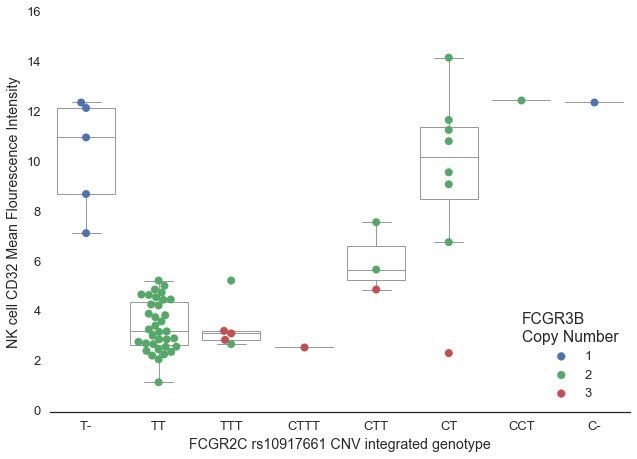

In [9]:
sns.set_style("white")
sns.set_context("talk")
ep = sns.boxplot(data=exprs_2c[~geno_mask], x="Genotype", y="MFI",
                 order=["T-", "TT", "TTT", "CTTT", "CTT", "CT", "CCT", "C-"],
                 color="white", linewidth=1)
ep = sns.swarmplot(data=exprs_2c[~geno_mask], x="Genotype", y="MFI",
             order=["T-", "TT", "TTT", "CTTT", "CTT", "CT", "CCT", "C-"],
             hue="CN_3B", size=8, edgecolor="white",
             marker="o")
sns.despine(left=True)
ep.set_xlabel("FCGR2C rs10917661 CNV integrated genotype")
ep.set_ylabel("NK cell CD32 Mean Flourescence Intensity")
ep.legend(title="FCGR3B\nCopy Number", loc=4)
plt.savefig("/Users/michaelm/Desktop/FCGR/Images/CD32_nkexpr-by-3B_CN.png", bbox_inches="tight", dpi=90)

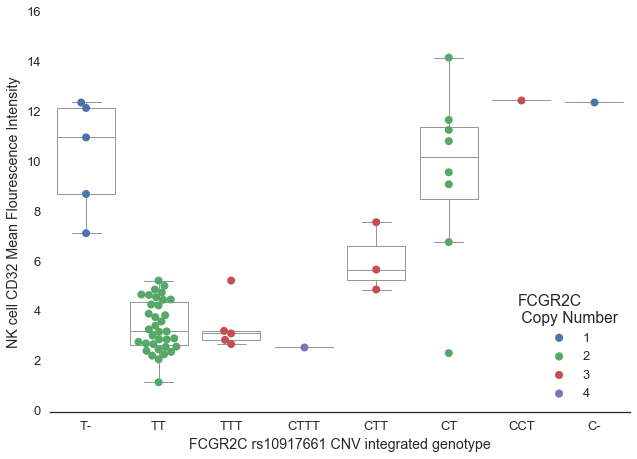

In [10]:
ap = sns.boxplot(data=exprs_2c[~geno_mask], x="Genotype", y="MFI",
                 order=["T-", "TT", "TTT", "CTTT", "CTT", "CT", "CCT", "C-"],
                 color="white", linewidth=1)
ap = sns.swarmplot(data=exprs_2c[~geno_mask], x="Genotype", y="MFI",
             order=["T-", "TT", "TTT", "CTTT", "CTT", "CT", "CCT", "C-"],
             hue="CN_2C", size=8, edgecolor="white",
             marker="o")
sns.despine(left=True)
ap.set_xlabel("FCGR2C rs10917661 CNV integrated genotype")
ap.set_ylabel("NK cell CD32 Mean Flourescence Intensity")
ap.legend(title="FCGR2C\n Copy Number", loc=4)
plt.savefig("/Users/michaelm/Desktop/FCGR/Images/CD32_nkexpr-by-2C_CN.png", bbox_inches="tight", dpi=90)

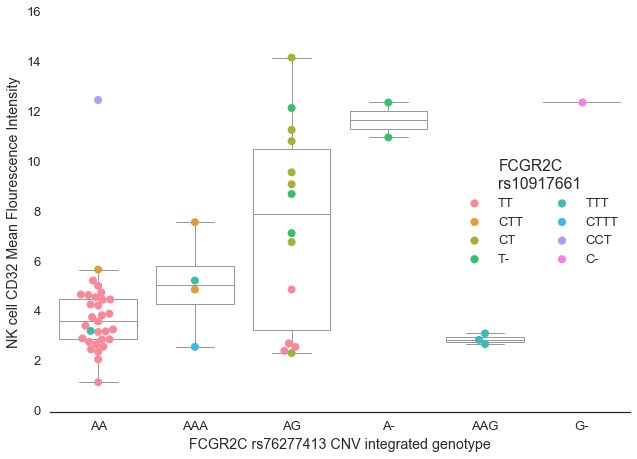

In [12]:
nn6_mask = exprs_2c["EXON6"] != "NN"
e6p = sns.boxplot(data=exprs_2c[~geno_mask & nn6_mask], x="EXON6", y="MFI",
                 color="white", linewidth=1)
e6p = sns.swarmplot(data=exprs_2c[~geno_mask & nn6_mask], x="EXON6", y="MFI",
             hue="Genotype", size=8, edgecolor="white",
             marker="o")
sns.despine(left=True)
e6p.set_xlabel("FCGR2C rs76277413 CNV integrated genotype")
e6p.set_ylabel("NK cell CD32 Mean Flourescence Intensity")
e6p.legend(title="FCGR2C\nrs10917661", loc=0, ncol=2)
plt.savefig("/Users/michaelm/Desktop/FCGR/Images/CD32_nkexpr-by-2C_ORF-exon6col.png", bbox_inches="tight", dpi=90)

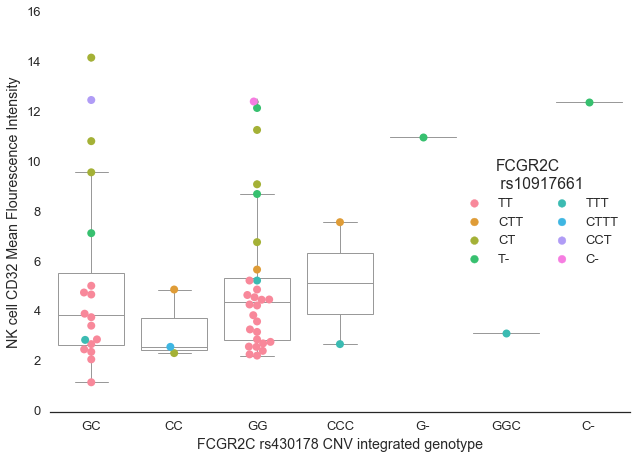

In [13]:
nn7_mask = exprs_2c["EXON7"] != "NN"
e7p = sns.boxplot(data=exprs_2c[~geno_mask & nn7_mask], x="EXON7", y="MFI",
                 color="white", linewidth=1)
e7p = sns.swarmplot(data=exprs_2c[~geno_mask & nn7_mask], x="EXON7", y="MFI",
             hue="Genotype", size=8,
             marker="o")
sns.despine(left=True)
e7p.set_xlabel("FCGR2C rs430178 CNV integrated genotype")
e7p.set_ylabel("NK cell CD32 Mean Flourescence Intensity")
e7p.legend(title="FCGR2C\n rs10917661", loc=0, ncol=2)
plt.savefig("/Users/michaelm/Desktop/FCGR/Images/CD32_nkexpr-by-2C_ORF-exon7col.png", bbox_inches="tight", dpi=90)